In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, GRU, Dropout
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
def load_dataframe(subset_number):
    turbo_train= pd.read_csv(f"/content/drive/MyDrive/NASAturbofan/train_FD00{subset_number}.txt", sep='\s+',header=None, index_col=False)
    turbo_test = pd.read_csv(f'/content/drive/MyDrive/NASAturbofan/test_FD00{subset_number}.txt', sep='\s+',header=None, index_col=False)
    y_RUL = pd.read_csv(f'/content/drive/MyDrive/NASAturbofan/RUL_FD00{subset_number}.txt', sep='\s+',header=None, index_col=False)
    return turbo_train, turbo_test, y_RUL


In [3]:
turbo_train_1, turbo_test_1, y_RUL_1 = load_dataframe(1)
turbo_train_2, turbo_test_2, y_RUL_2 = load_dataframe(2)
turbo_train_3, turbo_test_3, y_RUL_3 = load_dataframe(3)
turbo_train_4, turbo_test_4, y_RUL_4 = load_dataframe(4)

In [4]:
def add_RUL_column(turbo_train, turbo_test, y_RUL):
  turbo_train.sort_values(by=[0, 1], inplace=True)
  turbo_train['RUL'] = turbo_train.groupby(0).cumcount(ascending=False)

  y_RUL_series=y_RUL[0]
  turbo_test.sort_values(by=[0, 1], inplace=True)
  adjusted_engine_numbers = turbo_test[0].values - 1
  turbo_test['RUL'] = turbo_test.groupby(0).cumcount(ascending=False) + y_RUL_series.iloc[adjusted_engine_numbers].values

  return turbo_train, turbo_test


In [5]:
turbo_train_1, turbo_test_1=add_RUL_column(turbo_train_1, turbo_test_1, y_RUL_1)
turbo_train_2, turbo_test_2=add_RUL_column(turbo_train_2, turbo_test_2, y_RUL_2)
turbo_train_3, turbo_test_3=add_RUL_column(turbo_train_3, turbo_test_3, y_RUL_3)
turbo_train_4, turbo_test_4=add_RUL_column(turbo_train_4, turbo_test_4, y_RUL_4)

In [6]:
def complete_dataframe(turbo_train, turbo_test):
  turbofan = pd.concat([turbo_train, turbo_test])
  return turbofan

In [7]:
turbofan1=complete_dataframe(turbo_train_1, turbo_test_1)
turbofan2=complete_dataframe(turbo_train_2, turbo_test_2)
turbofan3=complete_dataframe(turbo_train_3, turbo_test_3)
turbofan4=complete_dataframe(turbo_train_4, turbo_test_4)

#Preprocessing

##Correlation Analysis

In [8]:
def compute_pearson(turbofan):
  correlation_matrix = abs(turbofan.corr(method='pearson'))
  target_column = 'RUL'
  correlation = correlation_matrix[target_column]
  scaled_correlation = correlation * 100
  return round(scaled_correlation, 2)

In [9]:
p1=compute_pearson(turbofan1)
p2=compute_pearson(turbofan2)
p3=compute_pearson(turbofan3)
p4=compute_pearson(turbofan4)

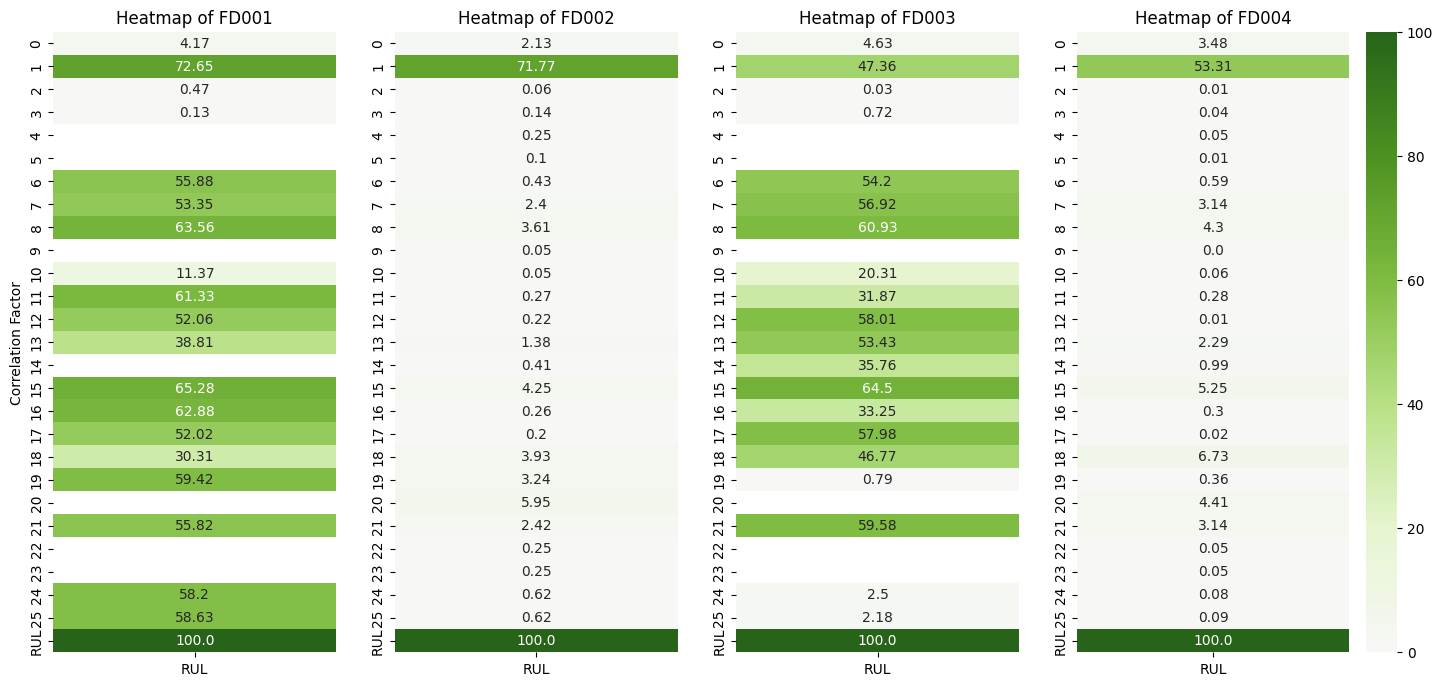

In [10]:
fig, axs = plt.subplots(1, 4, figsize=(15, 8), gridspec_kw={'width_ratios': [1, 1, 1, 1.2]})

sns.heatmap(p1.to_frame(), annot=True, center=0, cmap='PiYG', fmt='', ax=axs[0], cbar=False)
axs[0].set_title('Heatmap of FD001')
axs[0].set_ylabel('Correlation Factor')

sns.heatmap(p2.to_frame(), annot=True, center=0, cmap='PiYG', fmt='', ax=axs[1], cbar=False)
axs[1].set_title('Heatmap of FD002')

sns.heatmap(p3.to_frame(), annot=True, center=0, cmap='PiYG', fmt='', ax=axs[2], cbar=False)
axs[2].set_title('Heatmap of FD003')

sns.heatmap(p4.to_frame(), annot=True, center=0, cmap='PiYG', fmt='', ax=axs[3])
axs[3].set_title('Heatmap of FD004')

plt.tight_layout(rect=[0, 0.03, 1, 0.95], pad=2.5)

plt.show()


In [11]:
def all_correlations(turbofan):
  correlation_matrix = turbofan.corr(method='pearson')
  return round(correlation_matrix, 2)

In [12]:
pear1=all_correlations(turbofan1)
pear2=all_correlations(turbofan2)
pear3=all_correlations(turbofan3)
pear4=all_correlations(turbofan4)

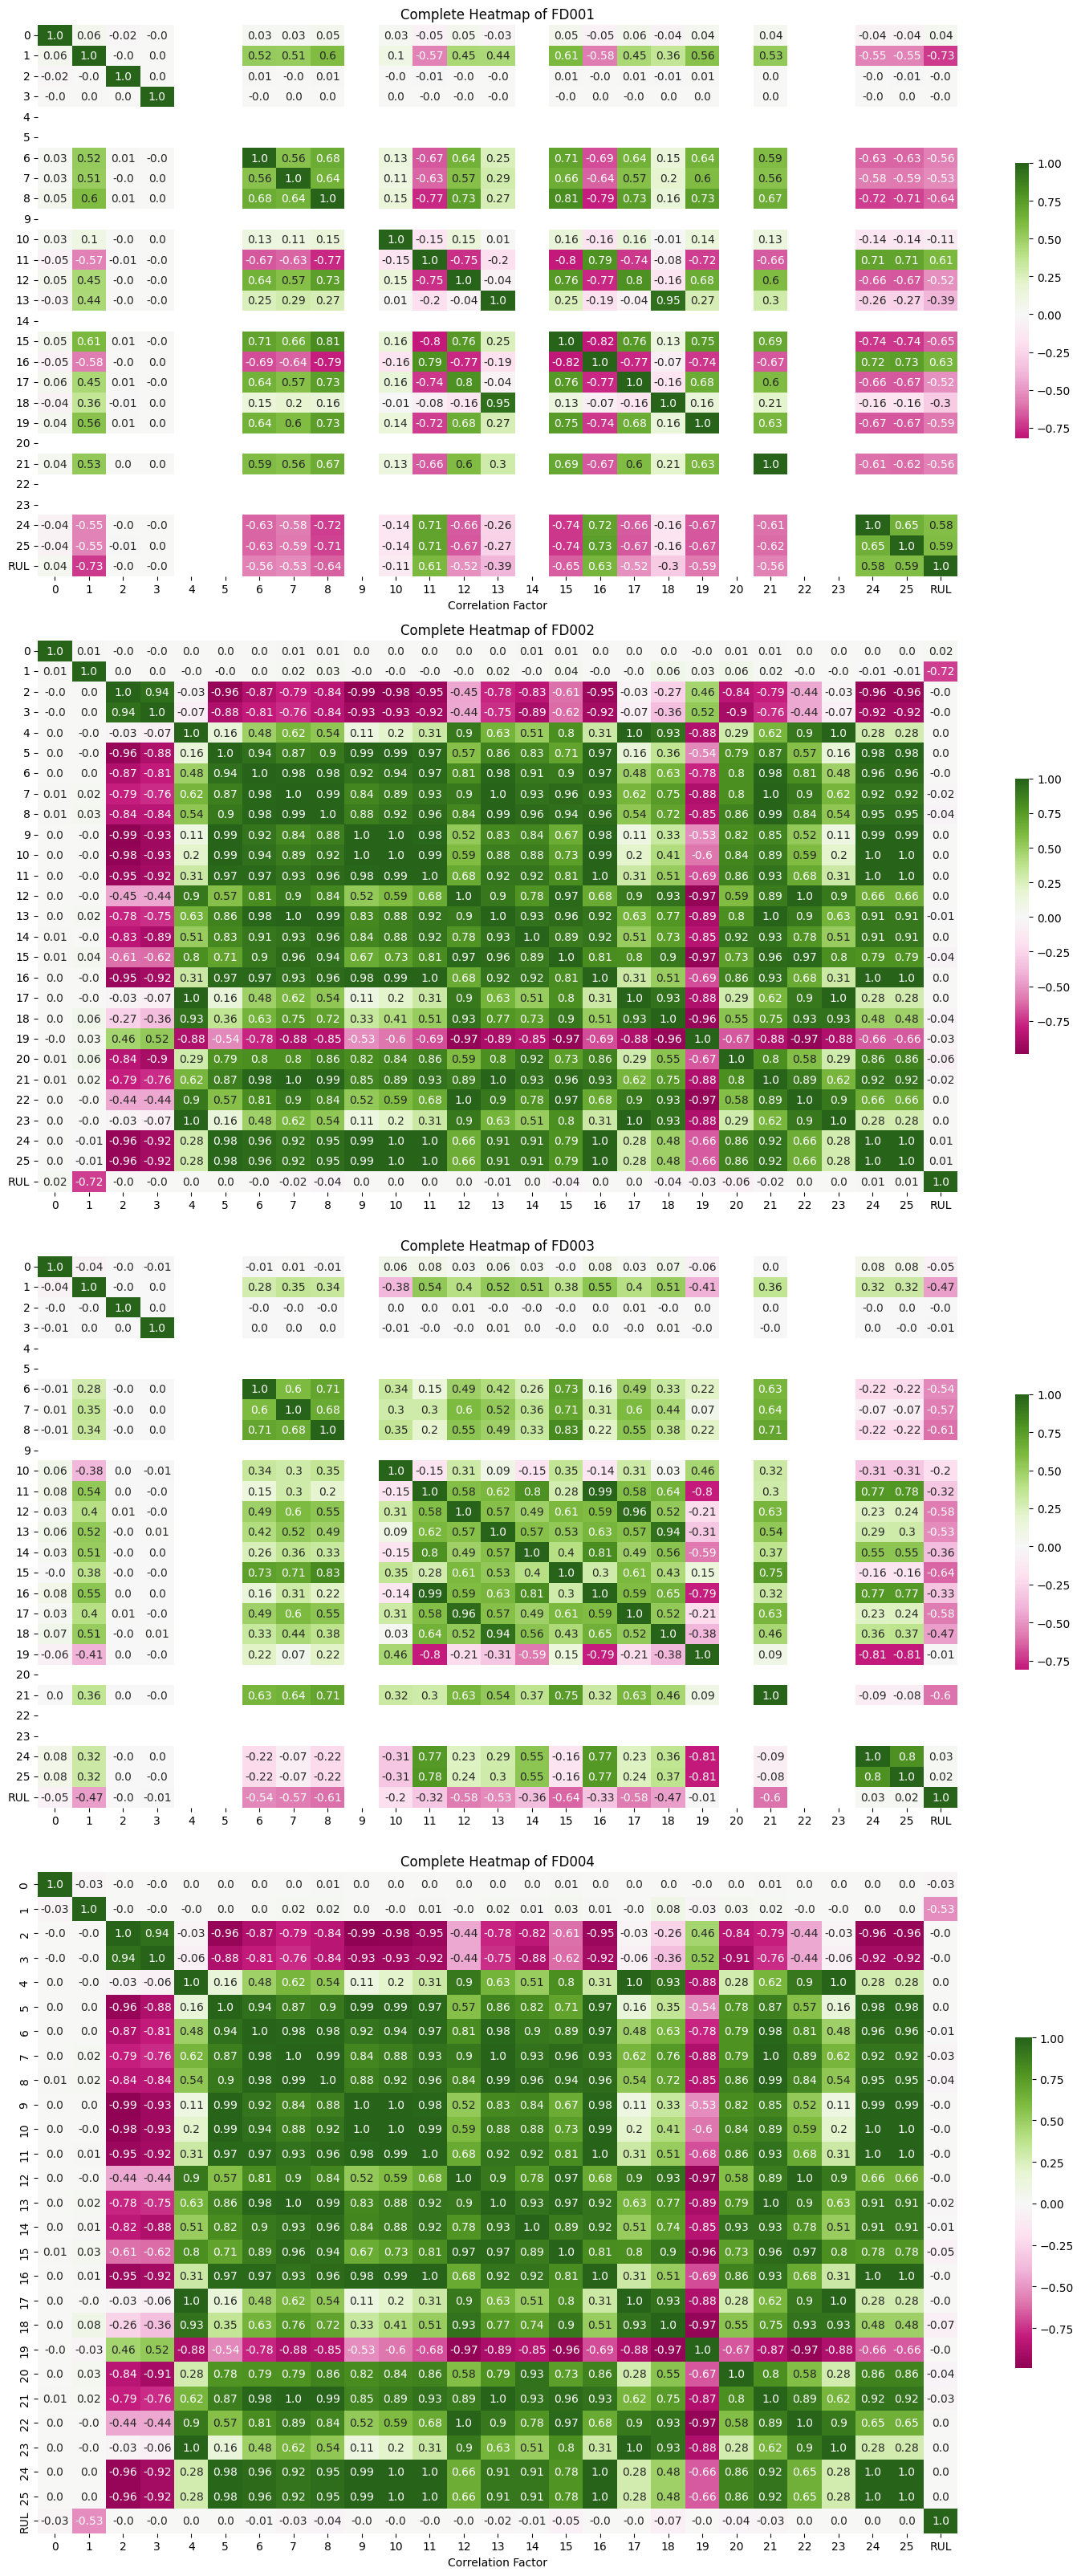

In [13]:
fig, axs = plt.subplots(4, 1, figsize=(15, 35), gridspec_kw={'height_ratios': [1, 1, 1, 1.2]})

sns.heatmap(pear1, annot=True, center=0, cmap='PiYG', fmt='', ax=axs[0], cbar_kws={"shrink": .5})
axs[0].set_title('Complete Heatmap of FD001')
axs[0].set_xlabel('Correlation Factor')

sns.heatmap(pear2, annot=True, center=0, cmap='PiYG', fmt='', ax=axs[1], cbar_kws={"shrink": .5})
axs[1].set_title('Complete Heatmap of FD002')

sns.heatmap(pear3, annot=True, center=0, cmap='PiYG', fmt='', ax=axs[2], cbar_kws={"shrink": .5})
axs[2].set_title('Complete Heatmap of FD003')

sns.heatmap(pear4, annot=True, center=0, cmap='PiYG', fmt='', ax=axs[3], cbar_kws={"shrink": .5})
axs[3].set_title('Complete Heatmap of FD004')
axs[3].set_xlabel('Correlation Factor')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [14]:
sensor_pairs = []
for i, pear in enumerate([pear1, pear2, pear3, pear4], start=1):
    for sensor1, row in pear.iterrows():
        for sensor2, correlation in row.items():
            if correlation == 1 and sensor1 != sensor2:
                sensor_pairs.append((f'FD00{i}_{sensor1}', f'FD00{i}_{sensor2}'))

sensor_pairs_list= pd.DataFrame(sensor_pairs, columns=['Sensor1', 'Sensor2'])

In [15]:
sensor_pairs_list

,Sensor1,Sensor2
0,FD002_4,FD002_17
1,FD002_4,FD002_23
2,FD002_7,FD002_13
3,FD002_7,FD002_21
4,FD002_9,FD002_10
...,...,...
59,FD004_24,FD004_25
60,FD004_25,FD004_10
61,FD004_25,FD004_11
62,FD004_25,FD004_16


##Exclusions from each dataset based on correlation:
###Subset 1:
 0, 1, 2, 3, 4, 5, 9, 14, 20, 22, 23

###Subset 2:
9, 13, 16, 17, 21, 23, 22,  24, 25

###Subset 3:
0, 1, 2, 3, 4, 5, 9, 19, 20, 22, 23

###Subset 4:
 9, 13, 16, 17, 21, 22, 23, 24, 25

In [16]:
turbofan1 = turbofan1.drop(columns=[0, 1, 2, 3, 4, 5, 9, 14, 20, 22, 23 ])
turbofan2 = turbofan2.drop(columns=[0, 1, 9, 13, 16, 17, 21, 23, 22, 24, 25])
turbofan3 = turbofan3.drop(columns=[0, 1, 2, 3, 4, 5, 9, 19, 20, 22, 23])
turbofan4 = turbofan4.drop(columns=[0, 1, 9, 13, 16, 17, 21, 22, 23, 24, 25 ])

In [17]:
turbofan1

,6,7,8,10,11,12,13,15,16,17,18,19,21,24,25,RUL
0,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,643.24,1599.45,1415.79,21.61,553.41,2388.02,9142.37,47.69,520.69,2388.00,8213.28,8.4715,394,38.65,23.1974,24
13092,643.22,1595.69,1422.05,21.61,553.22,2388.05,9140.68,47.60,521.05,2388.09,8210.85,8.4512,395,38.57,23.2771,23
13093,643.44,1593.15,1406.82,21.61,553.04,2388.11,9146.81,47.57,521.18,2388.04,8217.24,8.4569,395,38.62,23.2051,22
13094,643.26,1594.99,1419.36,21.61,553.37,2388.07,9148.85,47.61,521.33,2388.08,8220.48,8.4711,395,38.66,23.2699,21


##Filtering

In [18]:
def moving_median( turbofan, window_size, period):
  columns_to_filter = turbofan.columns.drop('RUL')
  filtered_turbo = turbofan.copy()
  filtered_turbo[columns_to_filter] = turbofan[columns_to_filter].rolling(window=window_size, min_periods=period, axis=0).median()
  return filtered_turbo

In [19]:
filtered_turbo1=moving_median(turbofan1, 5, 1)
filtered_turbo2=moving_median(turbofan2, 5, 1)
filtered_turbo3=moving_median(turbofan3, 5, 1)
filtered_turbo4=moving_median(turbofan4, 5, 1)

##Data Normalization

In [20]:
def z_score(turbofan):
  scaler = StandardScaler()
  normalized_turbo = turbofan.copy()
  columns_to_normalize = turbofan.columns.drop('RUL')
  normalized_turbo[columns_to_normalize] = scaler.fit_transform(turbofan[columns_to_normalize])
  return normalized_turbo

In [21]:
normalized_turbo1=z_score(turbofan1)
normalized_turbo2=z_score(turbofan2)
normalized_turbo3=z_score(turbofan3)
normalized_turbo4=z_score(turbofan4)

In [22]:
normalized_turbo1

,6,7,8,10,11,12,13,15,16,17,18,19,21,24,25,RUL
0,-1.644975,0.020217,-0.794964,0.155673,1.008357,-0.396802,-0.864091,-0.090766,0.168348,-0.981906,-0.199424,-0.461431,-0.655669,1.254019,1.091572,191
1,-0.949920,0.383216,-0.493750,0.155673,0.276905,-0.694283,-0.975799,-0.010603,1.062424,-0.242468,-0.634651,-0.113571,-0.655669,0.902637,1.136638,190
2,-0.528674,-0.272579,-0.368046,0.155673,0.888447,-0.099321,-0.508416,-0.892393,1.264312,-0.834018,-0.528438,-0.509509,-2.018065,0.609819,0.358754,189
3,-0.528674,-1.162954,-0.644357,0.155673,1.116276,0.346901,-0.690733,-1.453533,1.898818,-0.094581,-0.491813,-1.912263,-0.655669,0.199874,0.649726,188
4,-0.486549,-1.152680,-0.128498,0.155673,0.576681,-0.396802,-0.391966,-0.852312,0.932638,-0.686131,-0.493645,-0.181446,0.025530,0.317001,0.948535,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,1.345871,1.689670,1.006393,0.155673,-0.130789,-0.991764,4.203881,0.791025,-1.230449,-1.277681,4.357951,1.009197,0.706728,-1.147090,-1.079451,24
13092,1.303746,1.045861,1.748756,0.155673,-0.358619,-0.545543,4.114831,0.430292,-0.711308,0.053306,4.209620,0.435087,1.387926,-1.615598,-0.298627,23
13093,1.767116,0.610947,-0.057345,0.155673,-0.574457,0.346901,4.437836,0.310048,-0.523840,-0.686131,4.599676,0.596290,1.387926,-1.322780,-1.004014,22
13094,1.387995,0.926002,1.429753,0.155673,-0.178753,-0.248061,4.545329,0.470374,-0.307532,-0.094581,4.797451,0.997885,1.387926,-1.088526,-0.369166,21


#Implementing the performance measures

In [23]:
#the asymmetric scoring function  - MASCHLER !!!
def PHME_score(y_true, y_pred):
    dif=y_pred-y_true
    if dif>=0:
      score= math.exp(dif /10)-1
    else:
      score= math.exp(-dif /13)-1
    return score

In [24]:
print("Score for an overestimation: ", PHME_score(112, 192))
print("Score for an underestimation: ", PHME_score(192, 112))

Score for an overestimation:  2979.9579870417283
Score for an underestimation:  469.5236172558757
